# Rapport de projet Kaggle - Digit Recognizer


Auteur : Nasseha Sadim-Salim et Ariinui TERIITEHAU

Le but du projet est de reconnaître des chiffres manuscrites à l'aide de classifieur de Machine Learning 
sur deux base de données, une avec une base de petite dimension (8*8) et autre de grande dimension (28*28).


## Librairie utilisée dans le projet

In [1]:
################Librarie################
import numpy as np
import pandas as pd# charge un package pour le numérique
import matplotlib.pyplot as plt         # charge un package pour les graphiques
from sklearn.datasets import load_digits
import collections, numpy
from matplotlib import style
import seaborn as sns #faire de beau graphique 

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


#librairies pour la CAH 
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage 
import scipy.cluster.hierarchy as sch
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


from sklearn.model_selection import train_test_split

#libraries mesures de performances
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score


#library classifier

style.use("ggplot")
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import make_scorer, r2_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import confusion_matrix
from timeit import timeit  # charge un package pour des mesures de temps


# Library CNN Tensorflow et keras
#Librairie tensorflow et keras
from keras.datasets import mnist
import tensorflow as tf
import keras as ks
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from keras.layers import AvgPool2D, BatchNormalization, Reshape
from keras.optimizers import Adadelta, RMSprop, Adam
from keras.losses import categorical_crossentropy
from keras.wrappers.scikit_learn import KerasClassifier
from keras import backend as K
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import sklearn
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets, svm, metrics, model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from collections import defaultdict





#librairie sklearn
import sklearn as sk
from sklearn.model_selection import train_test_split #Tests de validation croisée
from sklearn import metrics #Calculs des taux de prédition
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix #Matrice de confusion
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer, r2_score
from sklearn.model_selection import cross_val_score, KFold 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)



## Importation de la base de données


In [2]:
# Chargement des données disponible dans le package sklearn
digits = load_digits()
X, y = digits.data, digits.target
X = X
y = y

In [3]:
#Montre les dimension de la base de données 
X.shape

(1797, 64)

In [4]:
#nombre d'observations par classes 
print(collections.Counter(y))

Counter({3: 183, 1: 182, 5: 182, 4: 181, 6: 181, 9: 180, 7: 179, 0: 178, 2: 177, 8: 174})


In [7]:
url_path_train = '/Users/teriitehau/Desktop/train.csv'
url_path_test = '/Users/teriitehau/Desktop/test.csv'

#Reading the data
Xtrain=pd.read_csv(url_path_train)
X1train = Xtrain

Xtest=pd.read_csv(url_path_test)
X1test = Xtest

y1train=X1train['label']
#y1test=X1test['label']

X1train.drop('label',axis=1,inplace=True)


training_images=X1train.to_numpy()
test_images=X1test.to_numpy()

In [240]:
#dimension de la seconde base 
print((np.unique(y1train)))
print(training_images.shape)
print(y1train.shape)

[0 1 2 3 4 5 6 7 8 9]
(42000, 784)
(42000,)


### Répartion des labels de la variable Y à prédire de la base 28*28

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


<ipython-input-77-fcbd971a2137>:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(


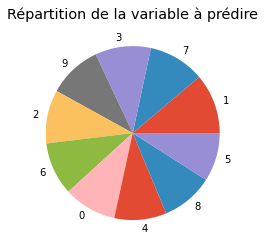

In [77]:
#Graphique piechart
print((y1train).value_counts())
plt.pie(
    y1train.value_counts(normalize = True).values,
    labels = y1train.value_counts(normalize = True).index,
)
plt.title("Répartition de la variable à prédire")
plt.show()

### Description des données 

Nous pouvons voir qu'il y a 64 pixels qui sont équivalents aux colonnes et il y a 1797 observations dans le jeu de données de petite base. 

In [25]:
print("Nombre de pixels :      {}".format(X.shape[1]))
print("Nombre d'observations : {}".format(X.shape[0]))
print("Nombre de classes :     {}".format(len(np.unique(y)))) 
#nb.unique(y) renvoi un vecteur des labels unique existant
#len() renvoi la taille du vecteur 

# Choix d'une observation quelconques de la base
idx_to_test = 60

print("Affichage d'une ligne de la matrice / image:")
print(X[idx_to_test, :])
print("Affichage de la classe / chiffre associé:")
print(y[idx_to_test])

Nombre de pixels :      64
Nombre d'observations : 1797
Nombre de classes :     10
Affichage d'une ligne de la matrice / image:
[ 0.  0. 10. 15. 14.  4.  0.  0.  0.  0.  4.  6. 13. 16.  2.  0.  0.  0.
  0.  3. 16.  9.  0.  0.  0.  0.  0.  1. 16.  6.  0.  0.  0.  0.  0.  0.
 10. 12.  0.  0.  0.  0.  0.  0.  1. 16.  4.  0.  0.  1.  9.  5.  6. 16.
  7.  0.  0.  0. 14. 12. 15. 11.  2.  0.]
Affichage de la classe / chiffre associé:
3


Nous avons une base de données avec 784 pixels

In [26]:
print("Nombre de pixels :      {}".format(X1train.shape[1]))
print("Nombre d'observations : {}".format(X1train.shape[0]))
print("Nombre de classes :     {}".format(len(np.unique(y1train)))) 


print("Affichage d'une ligne de la matrice / image:")
print(X1train.iloc[idx_to_test ])
print("Affichage de la classe / chiffre associé:")
print(y1train[idx_to_test])

Nombre de pixels :      784
Nombre d'observations : 6000
Nombre de classes :     10
Affichage d'une ligne de la matrice / image:
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 60, Length: 784, dtype: int64
Affichage de la classe / chiffre associé:
1


In [27]:
print((np.unique(y)))

[0 1 2 3 4 5 6 7 8 9]


# Analyses des données
Nous allons visualiser les données et réaliser la moyenne, variance et maximum des données selon les 10 labels (0 à 9)

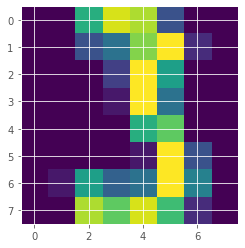

In [28]:
# Utilisation de la fonction imshow pour l'affichage de l'image numéro idx_to_test:
imgplot = plt.imshow(np.reshape(X[idx_to_test, :], (8, 8)))
#la fonction plt.imshow permet d'avoir une sortie 
#d'un graphique pixelisé en couleur 

#la fonction "np.reshape" permet de créer une nouvelle forme de 
#la ligne d'observation sans changer les données

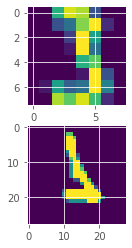

In [29]:
plt.subplot(211)
imgplot1 = plt.imshow(np.reshape(X[idx_to_test, :], (8, 8)))
plt.subplot(212)
imgplot = plt.imshow(training_images[idx_to_test].reshape(28, 28))



<ins>Commentaire</ins> : L'image sur la première sortie, nous pouvons voir qu'il y a moins de détail par rapport à la deuxième image

Text(0.5, 1.0, 'Le chiffre numéro 60 est un 3')

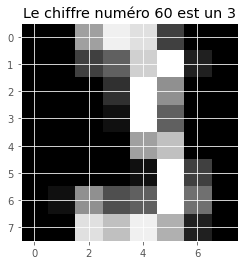

In [30]:
# Amélioration de la visualisation (niveau de gris) et de la légende:
imgplot = plt.imshow(np.reshape(X[idx_to_test, :], (8, 8)),
                     cmap='gray', aspect='equal', interpolation='nearest')

# Attention aux accents: ne pas oublier le u (Unicode) ci-dessous
plt.title(u'Le chiffre numéro %s est un %s' % (idx_to_test, y[idx_to_test]))

Liste des classes en présence:  [0 1 2 3 4 5 6 7 8 9]


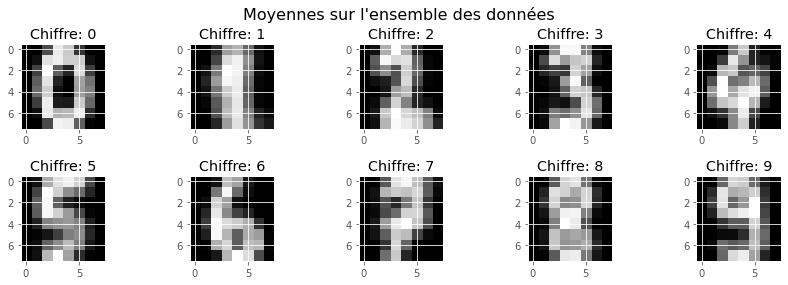

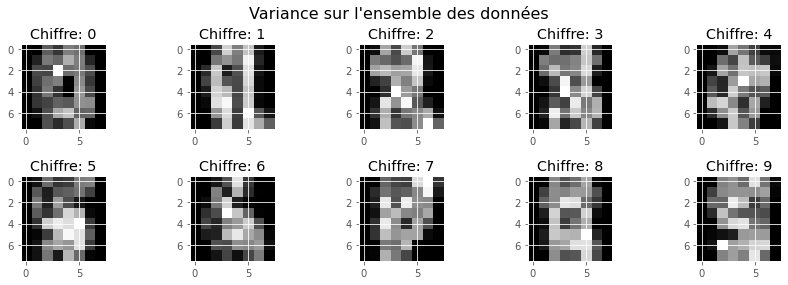

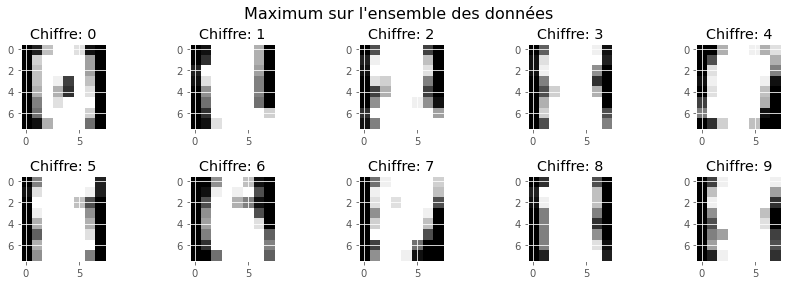

In [31]:
#Fonction affichage 
def disp_pics(pic_list, taille1, taille2, title=''):
    """" Fonction qui affiche une liste d'image codée en vecteur """""
    fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 4)) #creation d'une matrice de 2*5
    plt.suptitle(title, fontsize=16)
    for i in range(10):
        opt = dict(cmap='gray', aspect='equal', interpolation='nearest')
        axs.flat[i].imshow(pic_list[i].reshape(taille1, taille2), **opt)
        axs.flat[i].set_title("Chiffre: %s" % i) #affiche le titre + le label
    # Contre-balancer l'affichage pas terrible de matplotlib
    plt.tight_layout() #Ajustez automatiquement les paramètres de plot pour donner un remplissage spécifié.
    plt.subplots_adjust(top=0.85) # permet d'ajuster le plot
    
    
    
# Récupérer les modalités possible prises (Il y en a bien 10!) 
classes_list = np.unique(y).astype(int)
print ("Liste des classes en présence: ", classes_list)    

# Calculer un représentant moyen pour chaque chiffre 
Xi_mean = [np.mean(X[y == cls], axis=0) for cls in classes_list]  #boucle pour chaque valeur dans classes_list  
# Affichage des images moyennes par classe pour les données  
disp_pics(Xi_mean,8,8, title=(u"Moyennes sur l'ensemble des données"))

# Calculer un représentant variance pour chaque chiffre 
Xi_var = [np.var(X[y == cls], axis=0) for cls in classes_list]    
# Affichage des images moyennes par classe pour les données  
disp_pics(Xi_var,8,8, title=(u"Variance sur l'ensemble des données"))

# Calculer un représentant max pour chaque chiffre 
Xi_max = [np.max(X[y == cls], axis=0) for cls in classes_list]   
# Affichage des images moyennes par classe pour les données  
disp_pics(Xi_max,8,8, title=(u"Maximum sur l'ensemble des données"))

Liste des classes en présence:  [0 1 2 3 4 5 6 7 8 9]


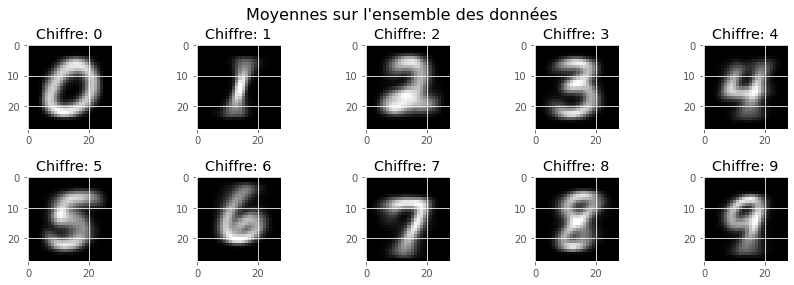

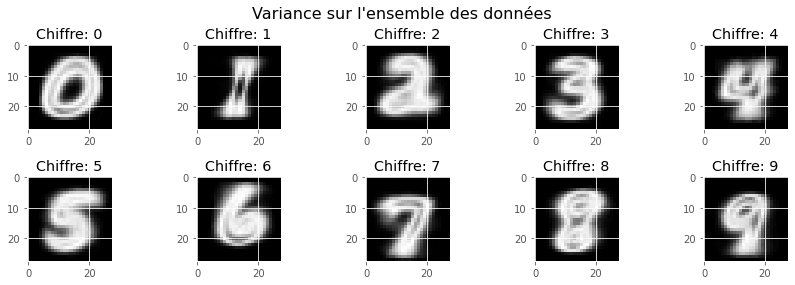

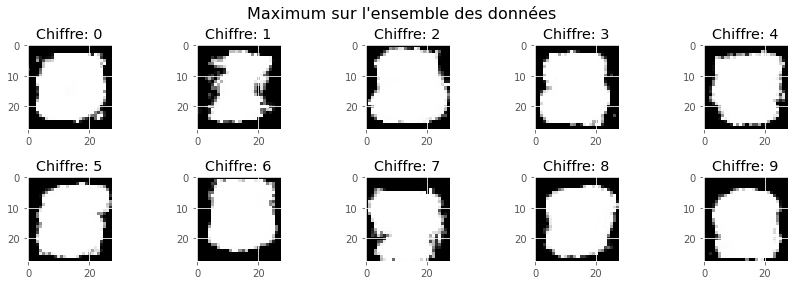

In [32]:
# Graphique sur la grande BD
classes_list = np.unique(y1train).astype(int)
print ("Liste des classes en présence: ", classes_list)   
 

# Calculer un représentant moyen pour chaque chiffre 
Xi_mean = [np.mean(training_images[y1train == cls], axis=0) for cls in classes_list]  #boucle pour chaque valeur dans classes_list  
# Affichage des images moyennes par classe pour les données  
disp_pics(Xi_mean,28,28, title=(u"Moyennes sur l'ensemble des données"))

# Calculer un représentant variance pour chaque chiffre 
Xi_var = [np.var(training_images[y1train == cls], axis=0) for cls in classes_list]    
# Affichage des images moyennes par classe pour les données  
disp_pics(Xi_var,28,28, title=(u"Variance sur l'ensemble des données"))

# Calculer un représentant max pour chaque chiffre 
Xi_max = [np.max(training_images[y1train == cls], axis=0) for cls in classes_list]   
# Affichage des images moyennes par classe pour les données  
disp_pics(Xi_max,28,28, title=(u"Maximum sur l'ensemble des données"))

# Analyse des composantes principales




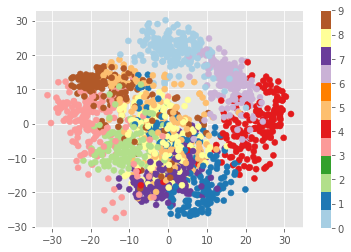

In [243]:
#ACP sur la base 8*8
pca = PCA()
proj = pca.fit_transform(X)
plt.scatter(proj[:, 0], proj[:, 1], c=y, cmap="Paired")
plt.colorbar()

<ins> Commentaire :</ins> les labels 8, 2 et 5 se confondent entre eux. Tandis que les autres labels se distinctent visuellement. Notons aussi que le graphique montre un représentation de dimension 1 et de dimensio 2 

[1.78907316e+02 1.63626641e+02 1.41709536e+02 1.01044115e+02
 6.94744827e+01 5.90756320e+01 5.18556662e+01 4.39906130e+01
 4.02885629e+01 3.69912020e+01 2.85031708e+01 2.73059660e+01
 2.18893003e+01 2.13124899e+01 1.76269077e+01 1.69374332e+01
 1.58425689e+01 1.49961105e+01 1.22276649e+01 1.08808010e+01
 1.06876155e+01 9.57726524e+00 9.22126826e+00 8.68553268e+00
 8.36095658e+00 7.16179198e+00 6.91588809e+00 6.18950881e+00
 5.88171633e+00 5.15299774e+00 4.48879723e+00 4.24451468e+00
 4.04518650e+00 3.94120891e+00 3.70440987e+00 3.52968776e+00
 3.08285758e+00 2.73627648e+00 2.67062197e+00 2.54029121e+00
 2.28171700e+00 1.90618094e+00 1.81615447e+00 1.68902395e+00
 1.40119202e+00 1.29149979e+00 1.15828926e+00 9.30701800e-01
 6.69477833e-01 4.85794730e-01 2.52210004e-01 9.90976176e-02
 6.30956535e-02 6.07039586e-02 3.96441561e-02 1.49422438e-02
 8.46835749e-03 3.62164306e-03 1.27634048e-03 6.60902920e-04
 4.11993910e-04 1.14223098e-30 1.14223098e-30 1.12479977e-30]


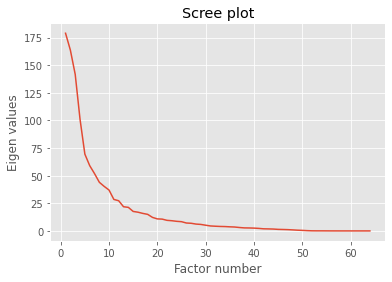

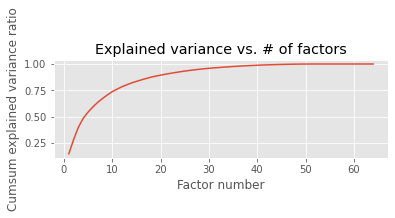

In [34]:
n = X.shape[0]
p = X.shape[1]
#valeur corrigée
eigval = (n-1)/n*pca.explained_variance_
print(eigval)
#scree plot
plt.subplot(111)
plt.plot(numpy.arange(1,p+1),eigval) 
plt.title("Scree plot") 
plt.ylabel("Eigen values")
plt.xlabel("Factor number") 
plt.show()
plt.subplot(211)
#cumul de variance expliquée
plt.plot(numpy.arange(1,p+1),numpy.cumsum(pca.explained_variance_ratio_)) 
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

<ins> Commentaire </ins> : nous pouvons dire que les 10 premières axes permettent d'être conservers

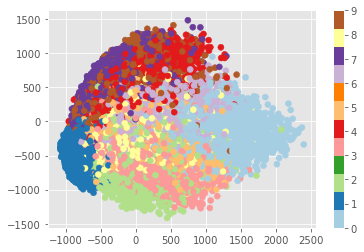

In [242]:
pca = PCA(n_components=2)
proj = pca.fit_transform(X1train)
plt.scatter(proj[:, 0], proj[:, 1], c=y1train, cmap="Paired")
plt.colorbar()

## Analyse non supervisée par CAH et k-means

In [19]:
print(y)

[0 1 2 ... 8 9 8]


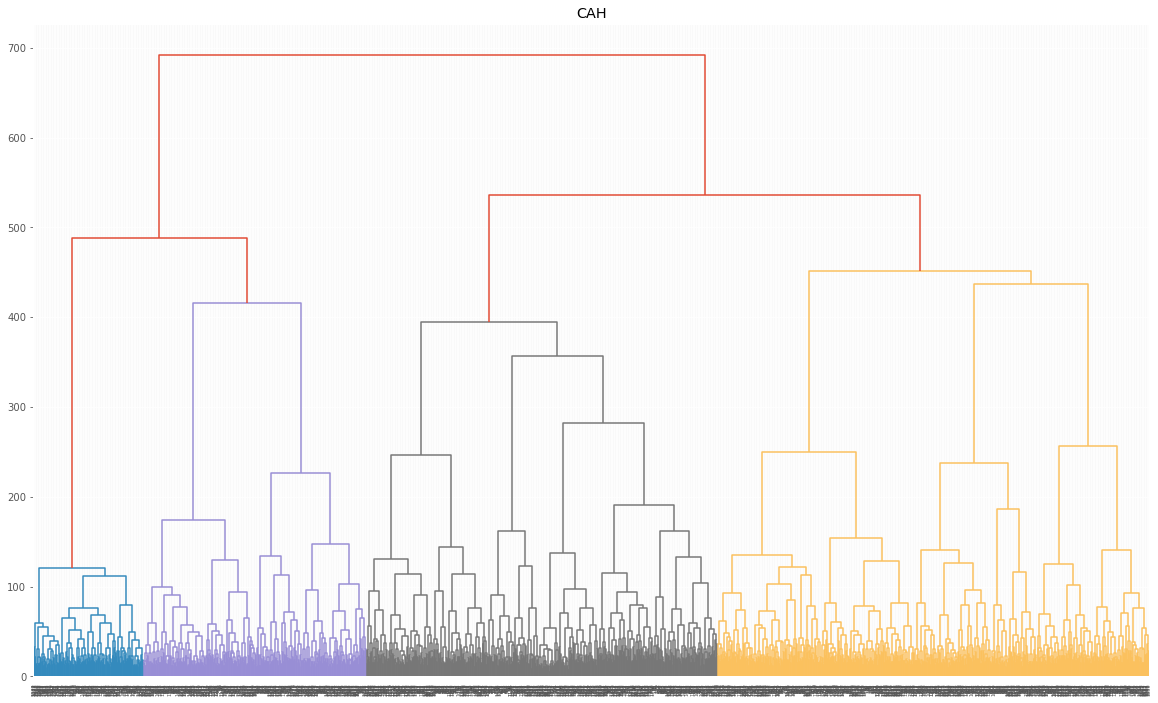

In [35]:
#générer la matrice des liens 
Z = linkage(X,method='ward',metric='euclidean') 

# génération et affichage du dendrogramme
plt.figure(figsize=(20,12))
plt.title("CAH") 
dendrogram(Z)
plt.show() 

n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.23s	69510	0.610	0.657	0.633	0.481	0.629	0.129
random   	0.17s	69907	0.633	0.674	0.653	0.518	0.649	0.131
PCA-based	0.03s	70768	0.668	0.695	0.681	0.558	0.678	0.142
__________________________________________________________________________________


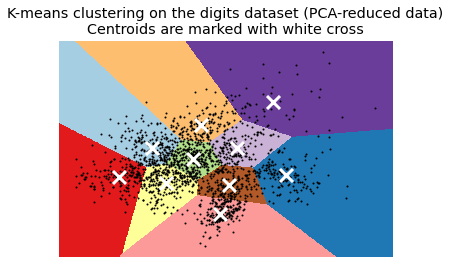

In [37]:
#Classification par k-means
np.random.seed(42)

X_digits = X
y_digits = y
data = scale(X_digits)

n_samples, n_features = data.shape
n_digits = len(np.unique(y_digits))
labels = y_digits

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)


# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualisation de ACP en deux dimensions

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

h = .02     

# graphique de décision des frontières des clusters assignés par couleur. 
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# on obtient les classement des observations 
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Résultat aux couleurs
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# graphique des centroïdes
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# Classification du labels 
Création d'une nouvelle base de données : X_train, X_test, y_train, y_test par split 



In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                    random_state=0)
print("Nb d'échantillons d'apprentissage (train) :  {}".format(X_train.shape[0]))
print("Nb d'échantillons de validation (test):    {}".format(X_test.shape[0]))

Nb d'échantillons d'apprentissage (train) :  800
Nb d'échantillons de validation (test):    200


# Recherche des meilleurs paramètres des classifieur (GridSearchCV)

## SVM GridSearchCV

In [85]:
#svm avec gridSearch 
parameters_svm =[{'kernel': ['rbf'], 'gamma': [1e-2 ,1e-3, 1e-4,1e-5],
                     'C': [1, 10, 100, 120]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 120]}]


SVM_grid = svm.SVC()

def recherche(classifier,parameters):
    
    clf = GridSearchCV(classifier, parameters, scoring = 'f1_macro', cv = 5 )
    clf.fit(X_train, y_train)
    gridsearch_result = pd.DataFrame(clf.cv_results_["params"])
    gridsearch_result["score"] = clf.cv_results_["mean_test_score"]
    clf_final = clf.best_estimator_
    print(clf_final.set_params)
    print("Score base train : ",clf_final.score(X_train,y_train)*100, "%")
    print("Score base test : ",clf_final.score(X_test,y_test)*100,"%")
    return gridsearch_result, clf_final

In [86]:
grid_svm ,clf_SVM_GRID= recherche(SVM_grid,parameters_svm)

<bound method BaseEstimator.set_params of SVC(C=1, gamma=0.001)>
Score base train :  100.0 %
Score base test :  99.5 %


<AxesSubplot:xlabel='C'>

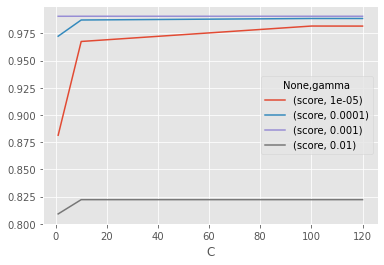

In [54]:
grid_svm[["C","gamma","score"]].groupby(["C","gamma"]).mean().unstack().plot()

### Meilleur paramètre pour SVM
SVC(C=10, gamma=0.001) avec par défaut rbf (gaussienne)

## Grid search avec Multi Layer Perceptron (MLP)


In [77]:

# Liste des classifieurs évalués
paramMLP_grid = {'solver': ['lbfgs','adam'], 
              'max_iter': [1000,1100],
              'alpha': 10.0 ** -np.arange(1, 4), #prend 4 valeurs comme 10^(-1),10^(-2)
              'hidden_layer_sizes':np.arange(10, 12),
              'activation':['tanh', 'relu']}
MLP = MLPClassifier()
grid_MLP ,clf_MLP= recherche(MLP,paramMLP_grid)



/Users/teriitehau/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/teriitehau/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/teriitehau/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/teriitehau/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: 

<AxesSubplot:xlabel='hidden_layer_sizes'>

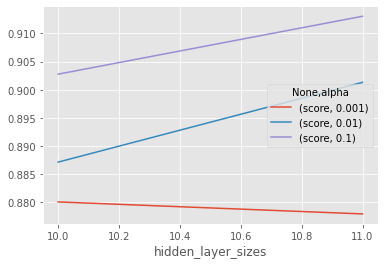

In [66]:
grid_MLP[["alpha","hidden_layer_sizes","score"]].groupby(["hidden_layer_sizes","alpha"]).mean().unstack().plot()

In [69]:
clf_MLP

MLPClassifier(alpha=0.001, hidden_layer_sizes=11, max_iter=1000)

MLP , meilleur paramètre avec MLPClassifier(alpha=0.001, hidden_layer_sizes=10, max_iter=1000) 

## Random forest

In [26]:
n_estimators = [80,100,150,200,400]
max_depth = [5, 10, 20, 30, 50]

parameters_rf = {'n_estimators': n_estimators ,
              'max_depth' : max_depth
             }

RF = RandomForestClassifier()
grid_RF ,clf_RF= recherche(RF,parameters_rf)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20, 30, 50],
                         'n_estimators': [80, 100, 150, 200, 400]},
             scoring='f1_macro')

<AxesSubplot:xlabel='n_estimators'>

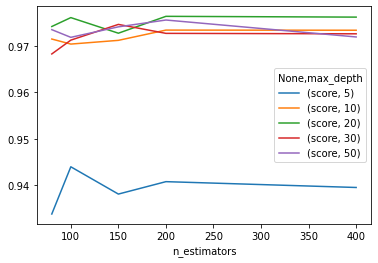

In [28]:
grid_RF[["n_estimators","max_depth","score"]].groupby(["n_estimators","max_depth"]).mean().unstack().plot()

In [79]:
clf_decisiontree = DecisionTreeClassifier(
                             class_weight = "balanced",
                             criterion='gini', random_state=0)

clf_decisiontree.fit(X_train, y_train)
print("Train F1-score : {}".format(
    f1_score(y_train, clf_decisiontree.predict(X_train), average='macro')
))
 
print("Valid F1-score : {}".format(
    f1_score(y_test, clf_decisiontree.predict(X_test), average='macro')
))

Train F1-score : 1.0
Valid F1-score : 0.8557263611467458


In [80]:
clf_decisiontree

DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [81]:
clf_gradient = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=4, random_state=0)
clf_gradient.fit(X_train, y_train)

print("Train F1-score : {}".format(
    f1_score(y_train, clf_gradient.predict(X_train), average='macro')
))
 
print("Valid F1-score : {}".format(
    f1_score(y_test, clf_gradient.predict(X_test), average='macro')
))

Train F1-score : 1.0
Valid F1-score : 0.9711615345411417


# Liste des classifieurs 


In [88]:
# Liste des classifieurs évalués
classifiers = [('KNN_k=1', KNeighborsClassifier(n_neighbors=1)),
               ('Gradient_boost', clf_gradient),
               ('Decision_tree',clf_decisiontree),
               ('SVM_Grid_search',clf_SVM_GRID),
               ('SVM_OVO',svm.SVC(decision_function_shape='ovo')),
               ('MLP_grid',MLPClassifier(alpha=0.001, hidden_layer_sizes=11, max_iter=1000)),
               ('Rand_forest', RandomForestClassifier(max_depth=30, n_estimators=400))
              ]

In [95]:
# Definition des métriques de performance
# w/ validation croisee
def perf_compute(x_train,y_train,x_test,y_test,clf, name, loops=10):
    """
    Calcule le temps d'apprentissage, de prediction, le score
    et la matrice de confusion d'un classifieur
    """
    # On initialise le conteneur
    perf = pd.Series(name=name,dtype=pd.StringDtype())
    # On crée les callables qu'on passera à la fonction de profiling
    fit = lambda: clf.fit(x_train, y_train)
    score_train = lambda: clf.score(x_train, y_train)
    score_test = lambda: clf.score(x_test, y_test)
    score_val_cross_train = cross_val_score(clf,x_train,y_train,cv=5)

    # On profile le temps des phases d'entrainement et de prédiction en ms
    perf['train_tps'] = timeit(fit, number=loops) / loops * 1000
    perf['test_tps'] = timeit(score_test, number=loops) / loops * 1000
    perf['total_tps'] = perf.train_tps + perf.test_tps
    # On calcule le score en pourcentage
    perf['score_test'] = fit().score(x_test, y_test) * 100
    # On calcule le score en pourcentage
    perf['score_train'] = fit().score(x_train, y_train) * 100
    # On calcule la matrice de confusion
    perf['conf_mat'] = [confusion_matrix(fit().predict(x_test), y_test)]
    # Normalisation par ligne de la matrice de confusion  pour avoir des pourcentages d'erreurs.
    # cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    perf['cross_val_train'] = score_val_cross_train.mean()*100

    return perf

 Commentaire :
Vérifier les échantillons des tests pour avoir plus de performance 

In [96]:
# On lance le calcule de performance. On profile en bouclant 100 fois
perfs = pd.DataFrame([perf_compute(X_train, y_train, X_test, y_test,clf, name) for name, clf in classifiers])
perfs = perfs.sort_values(by='score_train')#trie par rapport au score train 

perfs['train_tps test_tps total_tps score_test score_train cross_val_train'.split()].T

SVM_OVO     MLP_grid     KNN_k=1  Gradient_boost  \
train_tps        24.428181  1347.057992    1.148119     8080.084187   
test_tps          6.469063     0.388309   15.018117        8.799284   
total_tps        30.897244  1347.446301   16.166236     8088.883471   
score_test       99.000000    94.000000   99.000000       97.000000   
score_train      99.875000    99.875000  100.000000      100.000000   
cross_val_train  98.750000    92.250000   98.125000       95.875000   

                 Decision_tree  SVM_Grid_search  Rand_forest  
train_tps             7.218682        34.433778   647.306655  
test_tps              0.200442         6.893852    34.910479  
total_tps             7.419124        41.327630   682.217133  
score_test           86.000000        99.500000    98.500000  
score_train         100.000000       100.000000   100.000000  
cross_val_train      80.750000        98.750000    97.375000

In [97]:
perfs = perfs.sort_values(by='score_test')#trie par rapport au score test 

perfs['train_tps test_tps total_tps score_test score_train cross_val_train'.split()].T

Decision_tree     MLP_grid  Gradient_boost  Rand_forest  \
train_tps             7.218682  1347.057992     8080.084187   647.306655   
test_tps              0.200442     0.388309        8.799284    34.910479   
total_tps             7.419124  1347.446301     8088.883471   682.217133   
score_test           86.000000    94.000000       97.000000    98.500000   
score_train         100.000000    99.875000      100.000000   100.000000   
cross_val_train      80.750000    92.250000       95.875000    97.375000   

                   SVM_OVO     KNN_k=1  SVM_Grid_search  
train_tps        24.428181    1.148119        34.433778  
test_tps          6.469063   15.018117         6.893852  
total_tps        30.897244   16.166236        41.327630  
score_test       99.000000   99.000000        99.500000  
score_train      99.875000  100.000000       100.000000  
cross_val_train  98.750000   98.125000        98.750000

## Affichage de la matrice de confusion 
Cette matrice nous permet d'avoir une vision plus claire sur les prédictions faites avec les classifieurs. 
avec le pire modèle et le meilleur modèle en utilisant le critère de score

In [93]:
print(perfs['conf_mat'][0])

[array([[13,  0,  0,  0,  0,  1,  0,  0,  0,  1],
       [ 0, 21,  0,  0,  1,  1,  2,  0,  1,  1],
       [ 0,  0, 15,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  1,  0,  1,  0,  2],
       [ 0,  0,  0,  2, 24,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0, 10,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 19,  0,  1],
       [ 1,  0,  2,  0,  0,  0,  0,  0, 19,  0],
       [ 0,  2,  0,  1,  0,  2,  0,  1,  0, 13]])]


In [230]:
print(collections.Counter(y_test))

Counter({1: 25, 4: 25, 3: 23, 7: 21, 6: 20, 8: 20, 9: 19, 2: 17, 0: 15, 5: 15})


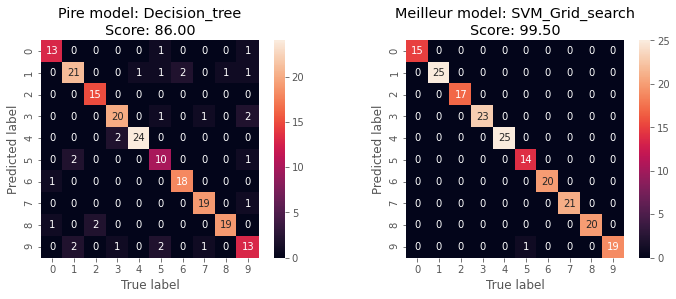

In [94]:
def plot_conf_mat(perf, ax, title='Model'):
    """
    Affichage de la matrice de confusion
    """
    sns.heatmap(perf.conf_mat[0], ax=ax, square=True, annot=True)
    ax.set_title('{}: {}\nScore: {:.2f}'.format(title, perf.name, perf.score_test))
    ax.set_xlabel('True label')
    ax.set_ylabel('Predicted label')

# Affichage du plus mauvais et du meilleur classifieur
# Les classifieurs sont classés par scores croissant
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
plot_conf_mat(perfs.iloc[0], ax=axs[0], title='Pire model')
plot_conf_mat(perfs.iloc[-1], ax=axs[1], title='Meilleur model')

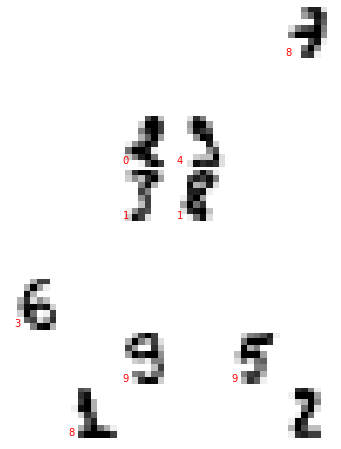

In [126]:
#Sortie des observation mal prédite avec 
predicted = clf_decisiontree.predict(X_test)
expected = y_test

# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    if predicted[i] != expected[i]:
        ax.text(0, 7, str(predicted[i]), color='red')
        ax = fig.add_subplot(8, 8, i +1, xticks=[], yticks=[])
        ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
                  interpolation='nearest')

In [124]:
expected.shape

(200,)

# Modélisation avec  CNN 

# Convolution Réseaux de Neurones
 Représentation en image à la sortie d'une couche Conv2D

In [58]:
#représentation des différents filtre afin de mieux comprendre son enjeux 
#https://sempwn.github.io/blog/2017/04/06/conv_net_intro
################Librarie################
(x_train, y_train), (x_test, y_test) = mnist.load_data()

batch_size = 128
nb_classes = 10
nb_epoch = 6

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#sub-sample of test data to improve training speed. Comment out
#if you want to train on full dataset.
x_train = x_train[:20000,:,:,:]
y_train = y_train[:20000]

#normalise the images and double check the shape and size of the image data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_test_inds = y_test.copy()
y_train_inds = y_train.copy()
y_train = keras.utils.to_categorical(y_train, nb_classes)
y_test = keras.utils.to_categorical(y_test, nb_classes)
num_classes = y_test.shape[1]
#Create new sequential model, same as before but just keep the convolutional layer.
model_new = Sequential()
model_new.add(Conv2D(nb_filters, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

def sorti_image(model,nb_filters):
    #set weights for new model from weights trained on MNIST.
    for i in range(1):
        model.layers[i].set_weights(model.layers[i].get_weights())
    
    #pick a random digit and "predict" on this digit (output will be first layer of CNN)
    i = np.random.randint(0,len(x_test))
    digit = x_test[i].reshape(1,28,28,1)
    pred = model.predict(digit)
    print("Chiffre : ", y_test_inds[i])

    #For all the filters, plot the output of the input
    plt.figure(figsize=(18,18))
    filts = pred[0]
    for i in range(nb_filters):
        filter_digit = filts[:,:,i]
        plt.subplot(6,6,i+1)
        plt.imshow(filter_digit,cmap='gray'); plt.axis('off');

Chiffre :  2
Chiffre :  6


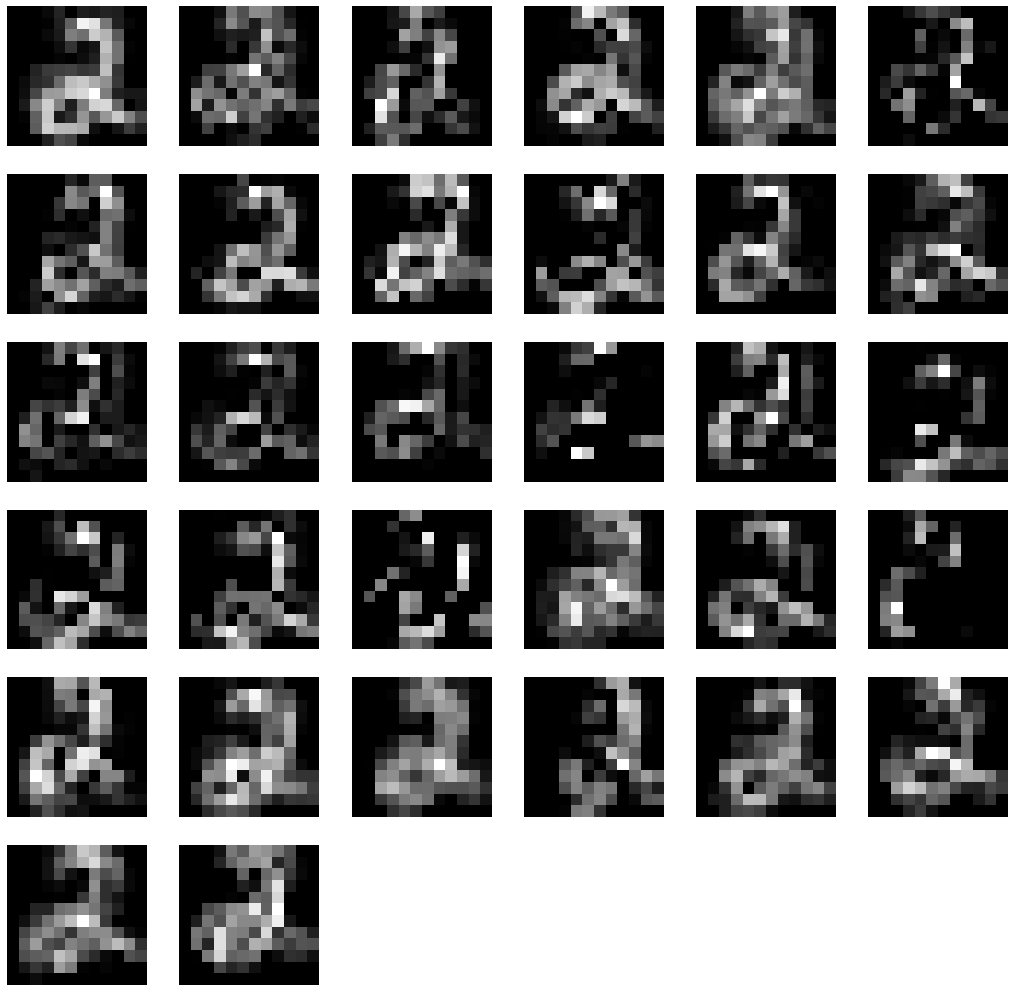

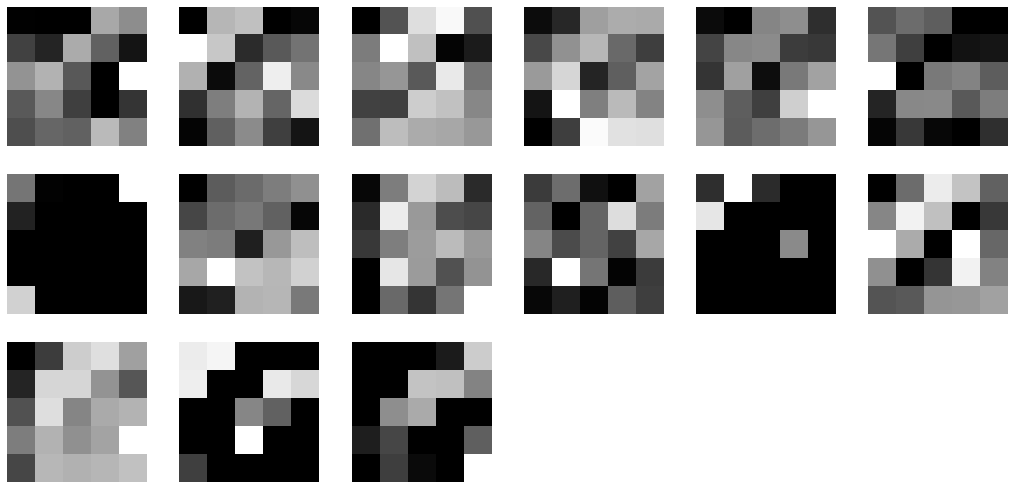

In [61]:
def medium_model1():
    # create model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), input_shape=input_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    return model

def large_model2():
    # create model
    model = Sequential()
    model.add(Conv2D(30, kernel_size=(5, 5), input_shape=input_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    return model


model = medium_model1()
sorti_image(model,nb_filters)
sorti_image(large_model2(),15)

In [9]:
################## CNN ##################
#importation de la base
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols,1) 


MNIST = tf.keras.datasets.mnist

(X_train1, y_train1), (X_test1, y_test1) = MNIST.load_data()

# ##################base kaggle ##################
# Pour la prédiction de la base kaggle 
kaggle_Xtest_final = X1test
kaggle_Xtest_final = kaggle_Xtest_final/255.0
kaggle_Xtest_final = kaggle_Xtest_final.values.reshape(kaggle_Xtest_final.shape[0], img_rows, img_cols, 1)

# ####################################


#reformation de la base MNIST
X_train1 = X_train1/255.0
X_test1 = X_test1/255.0

y_train1 = to_categorical(y_train1)
y_test1 = to_categorical(y_test1)



X_train1 = np.delete(X_train1, [range(56000)], 0)
X_test1 = np.delete(X_test1, [range(9000)], 0)



y_train1 = np.delete(y_train1, [range(56000)], 0)
y_test1 = np.delete(y_test1, [range(9000)], 0)


#creation d'une fonction dd'un graphique LOSS et ACCURACY
def plot_history_loss_and_acc(history_keras_nn):

    fig, axs = plt.subplots(1,2, figsize=(12,4))

    axs[0].plot(history_keras_nn.history['loss'])
    axs[0].plot(history_keras_nn.history['val_loss'])
    axs[0].set_title('model loss')
    axs[0].set_ylabel('loss')
    axs[0].set_xlabel('epoch')
    axs[0].legend(['train', 'validation'], loc='upper left')

    axs[1].plot(history_keras_nn.history['accuracy'])
    axs[1].plot(history_keras_nn.history['val_accuracy'])
    axs[1].set_title('model accuracy')
    axs[1].set_ylabel('accuracy')
    axs[1].set_xlabel('epoch')
    axs[1].legend(['train', 'validation'], loc='upper left')

    plt.show()
    

X_trainCNN = X_train1.reshape(X_train1.shape[0],img_rows, img_cols, 1)
X_testCNN = X_test1.reshape(X_test1.shape[0], img_rows, img_cols, 1)

num_classe = 10 # numero de classe à prédire 0 à 9 

batchsize = 100
def small_model():
    
    model = Sequential()
    
    model.add(Conv2D(64, kernel_size=(3, 3), activation= 'relu', input_shape=input_shape))  
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(loss=categorical_crossentropy, optimizer=Adadelta(), metrics=['accuracy'])

    return model

def medium_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), input_shape=input_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    mod 
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def large_model(drop):
    # create model
    model = Sequential()
    model.add(Conv2D(30, kernel_size=(5, 5), input_shape=input_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(drop))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# Matrice de confusion en heatmap

from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def model_CNN(model, list_acc):
    modeCNN = model
    history_cnn = modeCNN.fit(X_trainCNN, y_train1, validation_data=(X_testCNN,y_test1),epochs=10, batch_size=batchsize, verbose = 1)
    acc = history_cnn.history['accuracy']
    list_acc.append(acc)
    plot_history_loss_and_acc(history_cnn)
    y_pred = modeCNN.predict_classes(X_testCNN)
    y_pred = to_categorical(y_pred)
    matrice_confusion = confusion_matrix(y_test1.argmax(axis=1), y_pred.argmax(axis=1))
    print("Matrice de confusion : ",confusion_matrix(y_test1.argmax(axis=1), y_pred.argmax(axis=1)))
    print("Accuracy score sur Y_test : ",accuracy_score(y_test1.argmax(axis=1), y_pred.argmax(axis=1))*100,"%")
    classe = [0,1,2,3,4,5,6,7,8,9]
    # plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(matrice_confusion,classe, title='Normalized confusion matrix')
    plt.show()
    return history_cnn
    

list_acc_small = []
list_acc_medium = []
list_acc_large = []




#model_CNN(small_model, list_acc_small)
#model_CNN(medium_model, list_acc_medium)
#model_CNN(large_model, list_acc_large)






Epoch 1/10
40/40 [==============================] - 3s 77ms/step - loss: 2.2991 - accuracy: 0.1135 - val_loss: 2.2972 - val_accuracy: 0.1140
Epoch 2/10
40/40 [==============================] - 3s 75ms/step - loss: 2.2956 - accuracy: 0.1180 - val_loss: 2.2938 - val_accuracy: 0.1170
Epoch 3/10
40/40 [==============================] - 3s 72ms/step - loss: 2.2921 - accuracy: 0.1227 - val_loss: 2.2904 - val_accuracy: 0.1190
Epoch 4/10
40/40 [==============================] - 3s 79ms/step - loss: 2.2885 - accuracy: 0.1297 - val_loss: 2.2868 - val_accuracy: 0.1290
Epoch 5/10
40/40 [==============================] - 3s 80ms/step - loss: 2.2848 - accuracy: 0.1388 - val_loss: 2.2831 - val_accuracy: 0.1320
Epoch 6/10
40/40 [==============================] - 3s 80ms/step - loss: 2.2809 - accuracy: 0.1517 - val_loss: 2.2793 - val_accuracy: 0.1390
Epoch 7/10
40/40 [==============================] - 3s 73ms/step - loss: 2.2770 - accuracy: 0.1660 - val_loss: 2.2754 - val_accuracy: 0.1480
Epoch 8/10
40

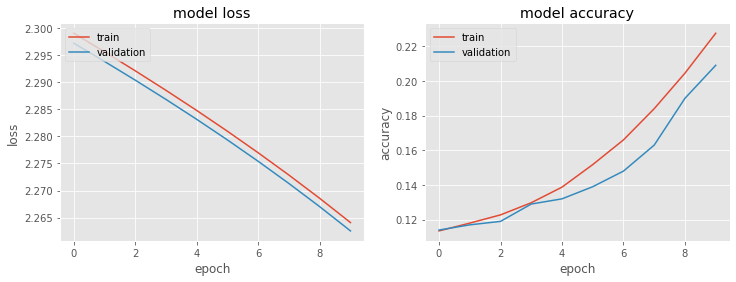

Matrice de confusion :  [[28  0 66  2  0  4  0  0  0  2]
 [ 0 14 80  0  0  0 25  0  0  0]
 [ 1  0 96  0  0  1  1  0  0  0]
 [ 0  0 76 11  0  4  9  0  0  2]
 [ 4  0 55  3  0 20  3  5  1  1]
 [ 5  0 45  4  0 22  3  1  0  5]
 [ 2  0 92  0  0  2  6  0  0  0]
 [19  0 37  7  0 22  5 17  2  6]
 [ 1  0 79  0  0 13  0  0  0  1]
 [12  0 16  3  4 15 19  4  2 15]]
Accuracy score sur Y_test :  20.9 %


<Figure size 432x288 with 0 Axes>

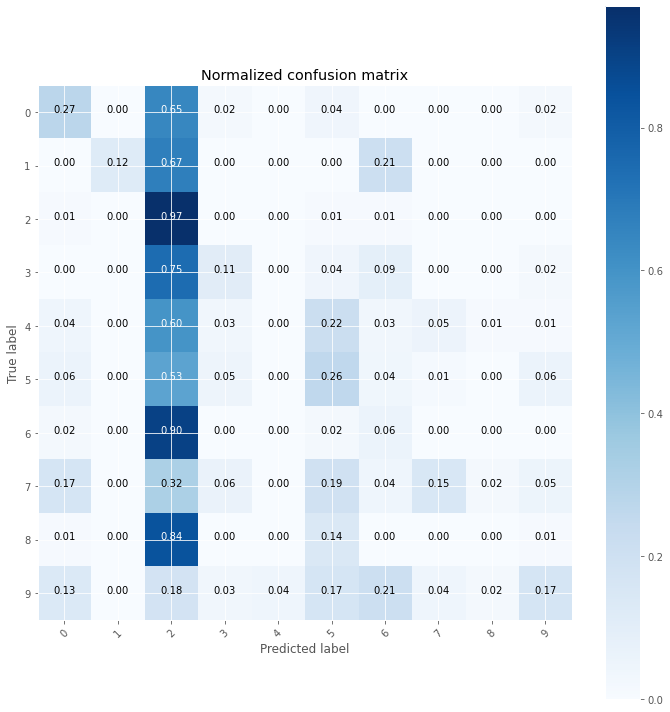

In [157]:
hist_small = model_CNN(small_model(), list_acc_small)

Epoch 1/10
40/40 [==============================] - 2s 42ms/step - loss: 0.7524 - accuracy: 0.7960 - val_loss: 0.3888 - val_accuracy: 0.8810
Epoch 2/10
40/40 [==============================] - 1s 23ms/step - loss: 0.2196 - accuracy: 0.9342 - val_loss: 0.2573 - val_accuracy: 0.9260
Epoch 3/10
40/40 [==============================] - 1s 24ms/step - loss: 0.1546 - accuracy: 0.9545 - val_loss: 0.2450 - val_accuracy: 0.9290
Epoch 4/10
40/40 [==============================] - 1s 26ms/step - loss: 0.1130 - accuracy: 0.9670 - val_loss: 0.2029 - val_accuracy: 0.9380
Epoch 5/10
40/40 [==============================] - 1s 27ms/step - loss: 0.0799 - accuracy: 0.9797 - val_loss: 0.1639 - val_accuracy: 0.9530
Epoch 6/10
40/40 [==============================] - 1s 26ms/step - loss: 0.0564 - accuracy: 0.9865 - val_loss: 0.1659 - val_accuracy: 0.9550
Epoch 7/10
40/40 [==============================] - 1s 25ms/step - loss: 0.0452 - accuracy: 0.9910 - val_loss: 0.1650 - val_accuracy: 0.9560
Epoch 8/10
40

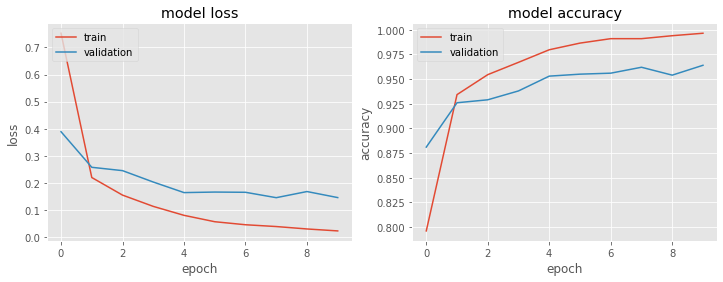

Matrice de confusion :  [[100   0   1   0   0   0   0   0   1   0]
 [  0 119   0   0   0   0   0   0   0   0]
 [  0   0  94   0   0   0   0   0   5   0]
 [  0   0   2  96   0   1   0   1   2   0]
 [  0   0   1   0  91   0   0   0   0   0]
 [  1   0   0   0   0  82   1   0   1   0]
 [  1   0   0   0   0   0 101   0   0   0]
 [  0   0   7   0   1   0   0 107   0   0]
 [  0   1   0   0   0   1   0   0  92   0]
 [  0   0   0   0   3   0   0   5   0  82]]
Accuracy score sur Y_test :  96.39999999999999 %


<Figure size 432x288 with 0 Axes>

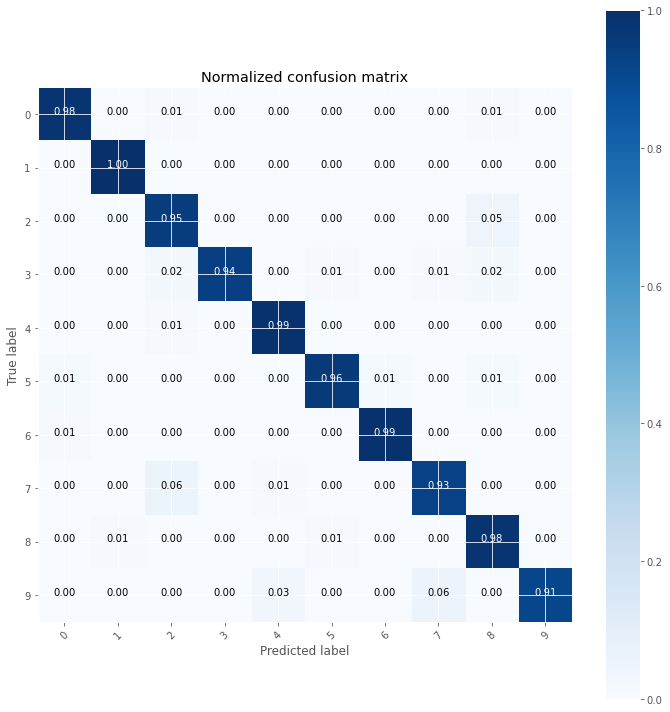

In [158]:
hist_medium = model_CNN(medium_model(), list_acc_medium)

Epoch 1/10
40/40 [==============================] - 1s 29ms/step - loss: 1.5571 - accuracy: 0.4950 - val_loss: 0.6035 - val_accuracy: 0.8050
Epoch 2/10
40/40 [==============================] - 1s 26ms/step - loss: 0.4041 - accuracy: 0.8745 - val_loss: 0.2894 - val_accuracy: 0.9180
Epoch 3/10
40/40 [==============================] - 1s 26ms/step - loss: 0.2286 - accuracy: 0.9302 - val_loss: 0.2178 - val_accuracy: 0.9390
Epoch 4/10
40/40 [==============================] - 1s 26ms/step - loss: 0.1860 - accuracy: 0.9427 - val_loss: 0.1722 - val_accuracy: 0.9560
Epoch 5/10
40/40 [==============================] - 1s 26ms/step - loss: 0.1337 - accuracy: 0.9603 - val_loss: 0.1622 - val_accuracy: 0.9500
Epoch 6/10
40/40 [==============================] - 1s 26ms/step - loss: 0.1170 - accuracy: 0.9643 - val_loss: 0.1420 - val_accuracy: 0.9600
Epoch 7/10
40/40 [==============================] - 1s 27ms/step - loss: 0.0926 - accuracy: 0.9728 - val_loss: 0.1208 - val_accuracy: 0.9690
Epoch 8/10
40

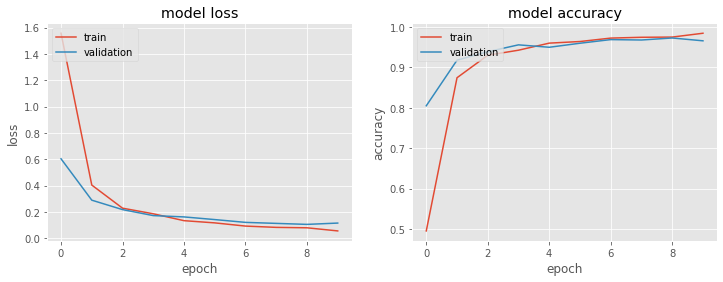

Matrice de confusion :  [[102   0   0   0   0   0   0   0   0   0]
 [  0 119   0   0   0   0   0   0   0   0]
 [  3   0  89   0   1   0   0   2   4   0]
 [  0   0   0 101   0   0   0   1   0   0]
 [  0   0   0   0  92   0   0   0   0   0]
 [  2   0   0   0   0  81   2   0   0   0]
 [  1   0   0   0   0   0 101   0   0   0]
 [  0   0   5   0   0   0   0 110   0   0]
 [  0   0   0   0   0   2   0   0  92   0]
 [  0   0   0   0   4   0   0   7   0  79]]
Accuracy score sur Y_test :  96.6 %


<Figure size 432x288 with 0 Axes>

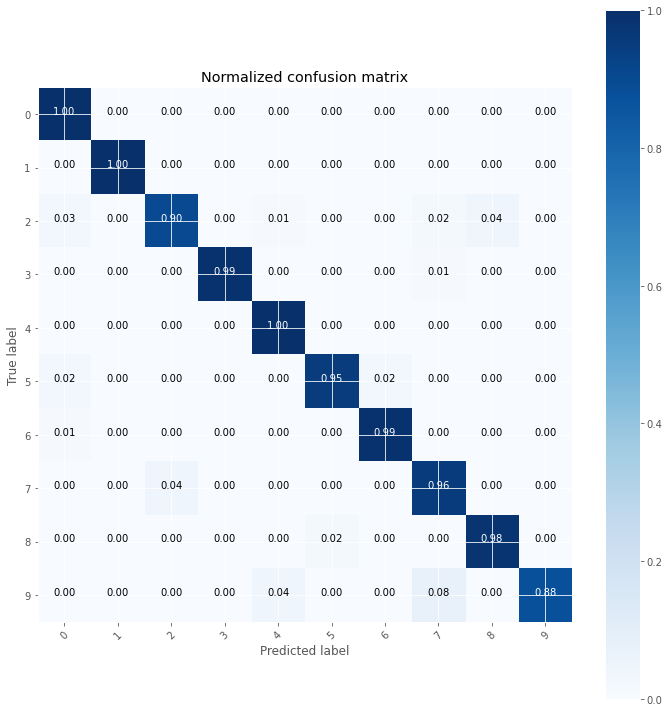

In [159]:
model_large1 =large_model(0.2)
hist_large = model_CNN(model_large1, list_acc_large)

In [160]:
#Permet de voir quel probabilite (0 à 1) est le plus optimum 
list_drop = [0.25,0.3,0.4, 0.5,0.6, 0.75,0.85]
list_acc = []
for drop in list_drop:
    modeCNN = large_model(drop)
    history_cnn_1 = modeCNN.fit(X_trainCNN, y_train1, validation_data=(X_testCNN,y_test1),epochs=10, batch_size=batchsize, verbose = 1)
    acc = history_cnn_1.history['accuracy']
    list_acc.append(acc)


    

Epoch 1/10
40/40 [==============================] - 1s 29ms/step - loss: 1.5617 - accuracy: 0.4970 - val_loss: 0.6357 - val_accuracy: 0.7950
Epoch 2/10
40/40 [==============================] - 1s 30ms/step - loss: 0.4666 - accuracy: 0.8520 - val_loss: 0.3472 - val_accuracy: 0.8940
Epoch 3/10
40/40 [==============================] - 1s 29ms/step - loss: 0.2931 - accuracy: 0.9103 - val_loss: 0.2551 - val_accuracy: 0.9250
Epoch 4/10
40/40 [==============================] - 1s 28ms/step - loss: 0.2003 - accuracy: 0.9415 - val_loss: 0.2096 - val_accuracy: 0.9390
Epoch 5/10
40/40 [==============================] - 1s 28ms/step - loss: 0.1650 - accuracy: 0.9465 - val_loss: 0.1530 - val_accuracy: 0.9500
Epoch 6/10
40/40 [==============================] - 1s 31ms/step - loss: 0.1481 - accuracy: 0.9555 - val_loss: 0.1479 - val_accuracy: 0.9530
Epoch 7/10
40/40 [==============================] - 1s 30ms/step - loss: 0.1161 - accuracy: 0.9663 - val_loss: 0.1501 - val_accuracy: 0.9560
Epoch 8/10
40

40/40 [==============================] - 1s 29ms/step - loss: 0.2786 - accuracy: 0.9120 - val_loss: 0.1326 - val_accuracy: 0.9630
Epoch 10/10
40/40 [==============================] - 1s 30ms/step - loss: 0.2586 - accuracy: 0.9202 - val_loss: 0.1521 - val_accuracy: 0.9580
Epoch 1/10
40/40 [==============================] - 1s 32ms/step - loss: 2.1704 - accuracy: 0.2200 - val_loss: 1.5223 - val_accuracy: 0.7700
Epoch 2/10
40/40 [==============================] - 1s 27ms/step - loss: 1.2811 - accuracy: 0.5825 - val_loss: 0.5138 - val_accuracy: 0.8710
Epoch 3/10
40/40 [==============================] - 1s 28ms/step - loss: 0.7989 - accuracy: 0.7412 - val_loss: 0.3506 - val_accuracy: 0.9140
Epoch 4/10
40/40 [==============================] - 1s 28ms/step - loss: 0.6731 - accuracy: 0.7828 - val_loss: 0.2764 - val_accuracy: 0.9410
Epoch 5/10
40/40 [==============================] - 1s 28ms/step - loss: 0.5700 - accuracy: 0.8225 - val_loss: 0.2371 - val_accuracy: 0.9430
Epoch 6/10
40/40 [=====

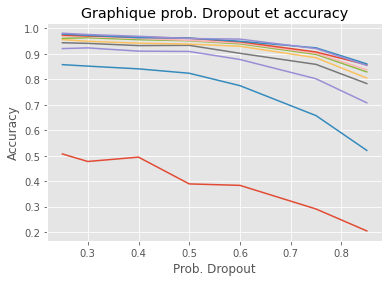

In [101]:
from pylab import *

x = list_drop
y = list_acc
plot(x, y)
plt.title("Graphique prob. Dropout et accuracy")
xlabel("Prob. Dropout")
ylabel("Accuracy")

show()

In [13]:
import requests
import json
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# This function saves a model on the drive using two files : a json and an h5
def save_keras_model(model, filename):
    # serialize model to JSON
    model_json = model.to_json()
    with open(filename+".json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(filename+".h5")
    
# This function loads a model from two files : a json and a h5
# BE CAREFUL : the model NEEDS TO BE COMPILED before any use !
def load_keras_model(filename):
    # load json and create model
    json_file = open(filename+".json", 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(filename+".h5")
    return loaded_model
    
save_keras_model(large_model(0.2), "large_model_save")

In [14]:
from keras.models import model_from_json
large_model_save1 = load_keras_model("large_model_save")
large_model_save1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Prédiction avec les données de Kaggle 

In [15]:
#retéléchargement de la base 
################## CNN ##################
#importation de la base

MNIST = tf.keras.datasets.mnist

(X_train1, y_train1), (X_test1, y_test1) = MNIST.load_data()

#reformation de la base MNIST
X_train1 = X_train1/255.0
X_test1 = X_test1/255.0

y_train1 = to_categorical(y_train1)
y_test1 = to_categorical(y_test1)

X_trainCNN = X_train1.reshape(X_train1.shape[0],img_rows, img_cols, 1)
X_testCNN = X_test1.reshape(X_test1.shape[0], img_rows, img_cols, 1)

num_classe = 10 # numero de classe à prédire 0 à 9 

batchsize = 200





In [16]:
X_trainCNN.shape

(60000, 28, 28, 1)

In [17]:
large_model_save1.fit(
   x=X_trainCNN, 
   y=y_train1,
   epochs=10,
   batch_size=200,
   shuffle=True
)
eval = large_model_save1.evaluate(X_testCNN, y_test1)




Epoch 1/10
300/300 [==============================] - 14s 45ms/step - loss: 0.3785 - accuracy: 0.8832
Epoch 2/10
300/300 [==============================] - 15s 50ms/step - loss: 0.0981 - accuracy: 0.9699
Epoch 3/10
300/300 [==============================] - 16s 53ms/step - loss: 0.0712 - accuracy: 0.9780
Epoch 4/10
300/300 [==============================] - 16s 55ms/step - loss: 0.0581 - accuracy: 0.9822
Epoch 5/10
300/300 [==============================] - 17s 56ms/step - loss: 0.0513 - accuracy: 0.9840
Epoch 6/10
300/300 [==============================] - 17s 57ms/step - loss: 0.0434 - accuracy: 0.9861
Epoch 7/10
300/300 [==============================] - 17s 57ms/step - loss: 0.0394 - accuracy: 0.9875
Epoch 8/10
300/300 [==============================] - 16s 53ms/step - loss: 0.0355 - accuracy: 0.9889
Epoch 9/10
300/300 [==============================] - 16s 54ms/step - loss: 0.0337 - accuracy: 0.9895
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0280 

0


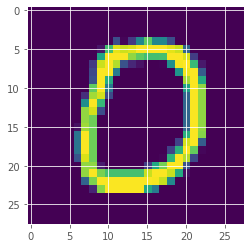

In [18]:
predictions = large_model_save1.predict(X_testCNN[0:100])
print(np.argmax(predictions[10]))
imgplot = plt.imshow(X_testCNN[10].reshape(28, 28))

In [19]:
predictions1 = large_model_save1.predict(kaggle_Xtest_final)

Nombre prédit par le modele retenu :  9


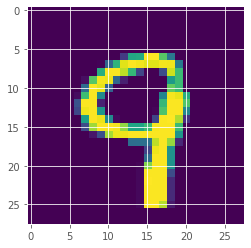

In [20]:
print("Nombre prédit par le modele retenu : ",np.argmax(predictions1[250]))
imgplot = plt.imshow(kaggle_Xtest_final[250].reshape(28, 28))

Nombre prédit par le modele retenu :  6


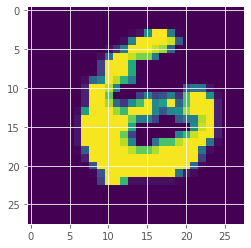

In [21]:
print("Nombre prédit par le modele retenu : ",np.argmax(predictions1[500]))
imgplot = plt.imshow(kaggle_Xtest_final[500].reshape(28, 28))

In [22]:
df = pd.DataFrame(predictions1)
path_save_csv = "/Users/teriitehau/Desktop/nasseha_ariinui_big_data/soumission.txt"
df.to_csv(path_save_csv)